In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="LopBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,5391.575854,19.009823,7176.043232,590.238706,142.277622,3391.005101,3484.507633,1016.736730,176.898917,195.790885,...,48.223830,37.278020,59467272,0.11918,14756.760214,2.844152e+06,20276.514614,825697.508512,44,42592.536
1996,6206.682558,37.744703,6810.317457,677.218307,137.423999,7728.645631,3737.141208,1113.256820,153.858116,224.369211,...,45.255728,37.081286,60130190,0.11918,14908.672765,2.785921e+06,20298.019980,824521.047143,43,50643.659
1997,6014.415215,36.238535,6988.106194,817.941119,149.159330,5647.894247,4542.778789,1172.783861,140.141879,234.727143,...,46.814732,36.564600,60846588,0.10214,14895.460065,2.790986e+06,20296.149536,824623.370686,43,49943.407
1998,6270.177149,28.193053,5739.574622,1090.869869,130.489143,3182.288913,4987.801949,1245.856126,474.662929,229.726314,...,42.303171,36.111727,61585103,0.17525,14862.702891,2.803542e+06,20291.512295,824877.053147,43,48207.329
1999,5684.674097,42.046276,4594.756351,958.722269,143.734495,2304.876078,4652.336854,1226.177795,564.896952,241.436570,...,44.267746,36.378900,62298569,0.24836,14800.560475,2.827362e+06,20282.715159,825358.304709,44,44913.880


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_4421/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.104362,-0.651607,-1.389047,-1.097043,-1.082380,0.316388,-0.969120,-0.986492,1.696478,-1.811601,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-0.739900,1.204546,-0.984172,1.232362,0.560890
2017,1.512656,2.638212,1.779250,1.531701,1.986360,-0.438012,2.282505,2.038846,1.189663,1.618091,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,0.723989,-1.373085,0.855633,-1.128467,-2.243559
1995,-1.166092,-0.712142,-1.149787,-1.732569,-1.099866,3.107990,-1.550310,-1.464429,-1.120701,-2.238646,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-0.792821,1.272585,-1.031648,1.298048,0.560890
2015,0.981605,0.828661,1.288585,1.254123,1.365056,-0.056081,1.127017,1.104427,0.647210,0.372410,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,3.088211,-1.370398,1.674908,-1.141442,2.243559
2016,1.060135,2.063359,1.384864,1.309671,1.092965,-0.086684,1.624742,1.358939,0.856398,0.474188,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.558884,-1.372506,1.667251,-1.260536,-0.897424
2004,-0.757063,-0.537334,-0.460810,-0.301311,-0.221536,-0.701403,-0.498057,-0.977588,-0.983514,0.393095,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.262860,0.591224,-0.556214,0.640254,0.336534
2013,1.324676,-0.150685,0.895025,1.036114,0.940178,0.510869,0.434545,0.576332,0.333911,1.099425,...,2.031246,0.817415,-0.339516,0.845079,0.308047,0.642615,-1.380570,-0.710412,-1.215222,-0.785246
2008,0.412717,-0.206629,-0.396032,-0.363827,-0.516968,-1.477573,-0.463071,0.433533,-0.745502,-0.348848,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.032549,0.191731,-0.277460,0.254579,0.112178
2003,-0.824253,-0.617037,-0.475580,-0.610916,-0.687440,-0.463488,-0.595104,-0.760223,-0.622555,0.249873,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.305019,0.645427,-0.594035,0.692582,0.336534


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(19.53726522022474,
  array([-0.21486875+0.j, -0.18887706+0.j, -0.22143612+0.j, -0.22396678+0.j,
         -0.21195014+0.j,  0.07252996+0.j, -0.21772498+0.j, -0.2155196 +0.j,
         -0.08366928+0.j, -0.1811339 +0.j, -0.21695779+0.j, -0.17599748+0.j,
         -0.21118199+0.j, -0.14961766+0.j, -0.21107688+0.j, -0.212296  +0.j,
         -0.22325896+0.j, -0.19813625+0.j, -0.21461064+0.j, -0.07637436+0.j,
         -0.0303588 +0.j, -0.05792491+0.j,  0.09890222+0.j, -0.21508057+0.j,
         -0.20166821+0.j, -0.13575079+0.j,  0.21948221+0.j, -0.18783755+0.j,
          0.21400629+0.j,  0.10391992+0.j])),
 (4.327550892048754,
  array([-0.03004858+0.j,  0.17193641+0.j,  0.03008368+0.j, -0.00959594+0.j,
          0.09847796+0.j,  0.21917208+0.j,  0.0874341 +0.j, -0.00237092+0.j,
          0.28182124+0.j, -0.16273983+0.j,  0.06174102+0.j, -0.19278624+0.j,
          0.08422548+0.j,  0.1208497 +0.j, -0.03855946+0.j, -0.13071991+0.j,
          0.05111049+0.j, -0.05174987+0.j, -0.09184051+0.j, -0.42

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([1.09282355e+04, 2.90012860e+02, 1.95806361e+04, 1.59479761e+03,
       2.33913852e+02, 2.18177910e+03, 6.59966307e+03, 1.65847764e+03,
       3.31248325e+02, 4.35074055e+02, 2.55711479e+03, 2.66950413e+03,
       3.41091294e+01, 2.38272585e+02, 1.12698683e+04, 3.55057317e+03,
       1.40377777e+03, 1.18719828e+02, 3.95032590e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.54129395e+04, 2.53013100e+06, 2.04112514e+04,
       8.18994397e+05, 3.90000000e+01])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      1.092824e+04
Mining and quarrying                                                   2.900129e+02
Manufacturing                                                          1.958064e+04
Electricity, gas, steam and air conditioning supply                    1.594798e+03
Water supply; sewerage, waste management and remediation activities    2.339139e+02
Construction                                                           2.181779e+03
Wholesale and retail trade and repair of motor vehicles                6.599663e+03
Transportation and storage                                             1.658478e+03
Accommodation and food service activities                              3.312483e+02
Information and communication                                          4.350741e+02
Financial and insurance activities                                     2.557115e+03
Real estate activities                                                 2.669

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([4.59727700e+03, 3.68462212e+02, 1.04460221e+04, 5.61397405e+02,
       8.06701610e+01, 3.76715573e+02, 1.94556927e+03, 4.24303908e+02,
       1.33352375e+02, 1.03493343e+02, 1.28148070e+03, 4.80730384e+02,
       2.13077095e+01, 6.47086367e+01, 3.84311543e+03, 1.11703938e+03,
       5.18055598e+02, 5.68495854e+01, 1.51977471e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 8.01369509e+02, 2.38922560e+05, 1.26456207e+02,
       5.00001431e+03, 8.63133825e+00])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      4.748047e+03
Mining and quarrying                                                   3.805461e+02
Manufacturing                                                          1.078861e+04
Electricity, gas, steam and air conditioning supply                    5.798087e+02
Water supply; sewerage, waste management and remediation activities    8.331578e+01
Construction                                                           3.890702e+02
Wholesale and retail trade and repair of motor vehicles                2.009375e+03
Transportation and storage                                             4.382192e+02
Accommodation and food service activities                              1.377257e+02
Information and communication                                          1.068875e+02
Financial and insurance activities                                     1.323508e+03
Real estate activities                                                 4.964

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

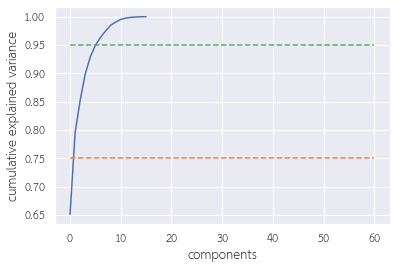

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(sk_scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,60], [0.75,0.75], '--')
plt.plot([0,60], [0.95,0.95], '--')
plt.xlabel('components')
plt.ylabel('cumulative explained variance');

#### components = 11

In [20]:
num_components=11
pca11 = PCA(n_components=num_components)
pca11.fit(sk_scaled_X_train)

PCA(n_components=11)

In [21]:
pca11.explained_variance_

array([20.83974957,  4.61605428,  1.83399551,  1.48470287,  0.96270829,
        0.65562889,  0.44184656,  0.36353692,  0.32174474,  0.18034322,
        0.1482697 ])

In [22]:
pca11.components_

array([[ 2.14868754e-01,  1.88877060e-01,  2.21436124e-01,
         2.23966777e-01,  2.11950144e-01, -7.25299611e-02,
         2.17724984e-01,  2.15519601e-01,  8.36692783e-02,
         1.81133902e-01,  2.16957788e-01,  1.75997479e-01,
         2.11181988e-01,  1.49617656e-01,  2.11076880e-01,
         2.12295999e-01,  2.23258956e-01,  1.98136246e-01,
         2.14610637e-01,  7.63743623e-02,  3.03588031e-02,
         5.79249128e-02, -9.89022184e-02,  2.15080572e-01,
         2.01668210e-01,  1.35750785e-01, -2.19482205e-01,
         1.87837554e-01, -2.14006289e-01, -1.03919925e-01],
       [ 3.00485794e-02, -1.71936407e-01, -3.00836793e-02,
         9.59593752e-03, -9.84779569e-02, -2.19172075e-01,
        -8.74341038e-02,  2.37092448e-03, -2.81821240e-01,
         1.62739828e-01, -6.17410173e-02,  1.92786244e-01,
        -8.42254802e-02, -1.20849700e-01,  3.85594594e-02,
         1.30719907e-01, -5.11104938e-02,  5.17498678e-02,
         9.18405063e-02,  4.25026652e-01,  3.27556738e-

In [23]:
pca11.explained_variance_ratio_

array([0.65124217, 0.1442517 , 0.05731236, 0.04639696, 0.03008463,
       0.0204884 , 0.01380771, 0.01136053, 0.01005452, 0.00563573,
       0.00463343])

In [24]:
np.sum(pca11.explained_variance_ratio_)

0.9952681427118399

<AxesSubplot:xlabel='PC', ylabel='Variance'>

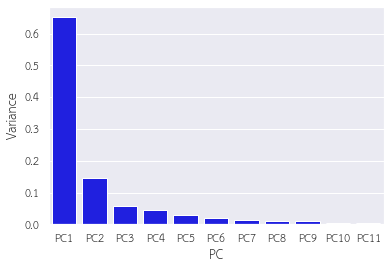

In [25]:
temp_df = pd.DataFrame({'Variance':pca11.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [26]:
sk_X_train_transformed  = pca11.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

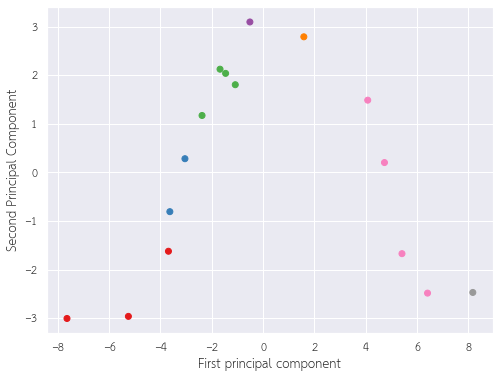

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [28]:
sk_derived_X_train = pca11.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.60602413e-02,  3.53048508e-02, -1.40102749e-02,
         1.98895955e-02, -2.68383109e-02,  6.40873275e-02,
         2.60668192e-02, -5.05612601e-02,  3.05359987e-02,
         8.57755140e-02,  4.73760173e-02,  9.89044471e-03,
        -3.46258464e-02, -6.50281990e-04,  1.46313601e-02,
         3.79905773e-02, -1.10718359e-02, -3.37119406e-02,
         5.57205756e-02, -1.15833057e-02, -4.06071832e-02,
        -1.00175092e-02,  3.99506664e-02,  2.23629758e-02,
        -1.53909157e-02, -6.41497593e-02, -1.48869862e-02,
        -4.17852326e-02, -2.97822199e-02,  7.09013435e-02],
       [-6.55441331e-02,  9.50352063e-02, -4.31492359e-02,
        -1.30544711e-02, -1.61192732e-01, -2.09345981e-03,
        -1.05636212e-02, -7.17494098e-02, -9.50649684e-03,
        -9.72645751e-03,  2.64807885e-02, -4.01117614e-02,
         5.80225524e-03, -2.16482033e-02,  1.03567070e-01,
         2.62265477e-03,  1.11907797e-02, -2.63422376e-02,
         1.97274506e-02,  3.38374032e-02, -5.66094036e-

<AxesSubplot:>

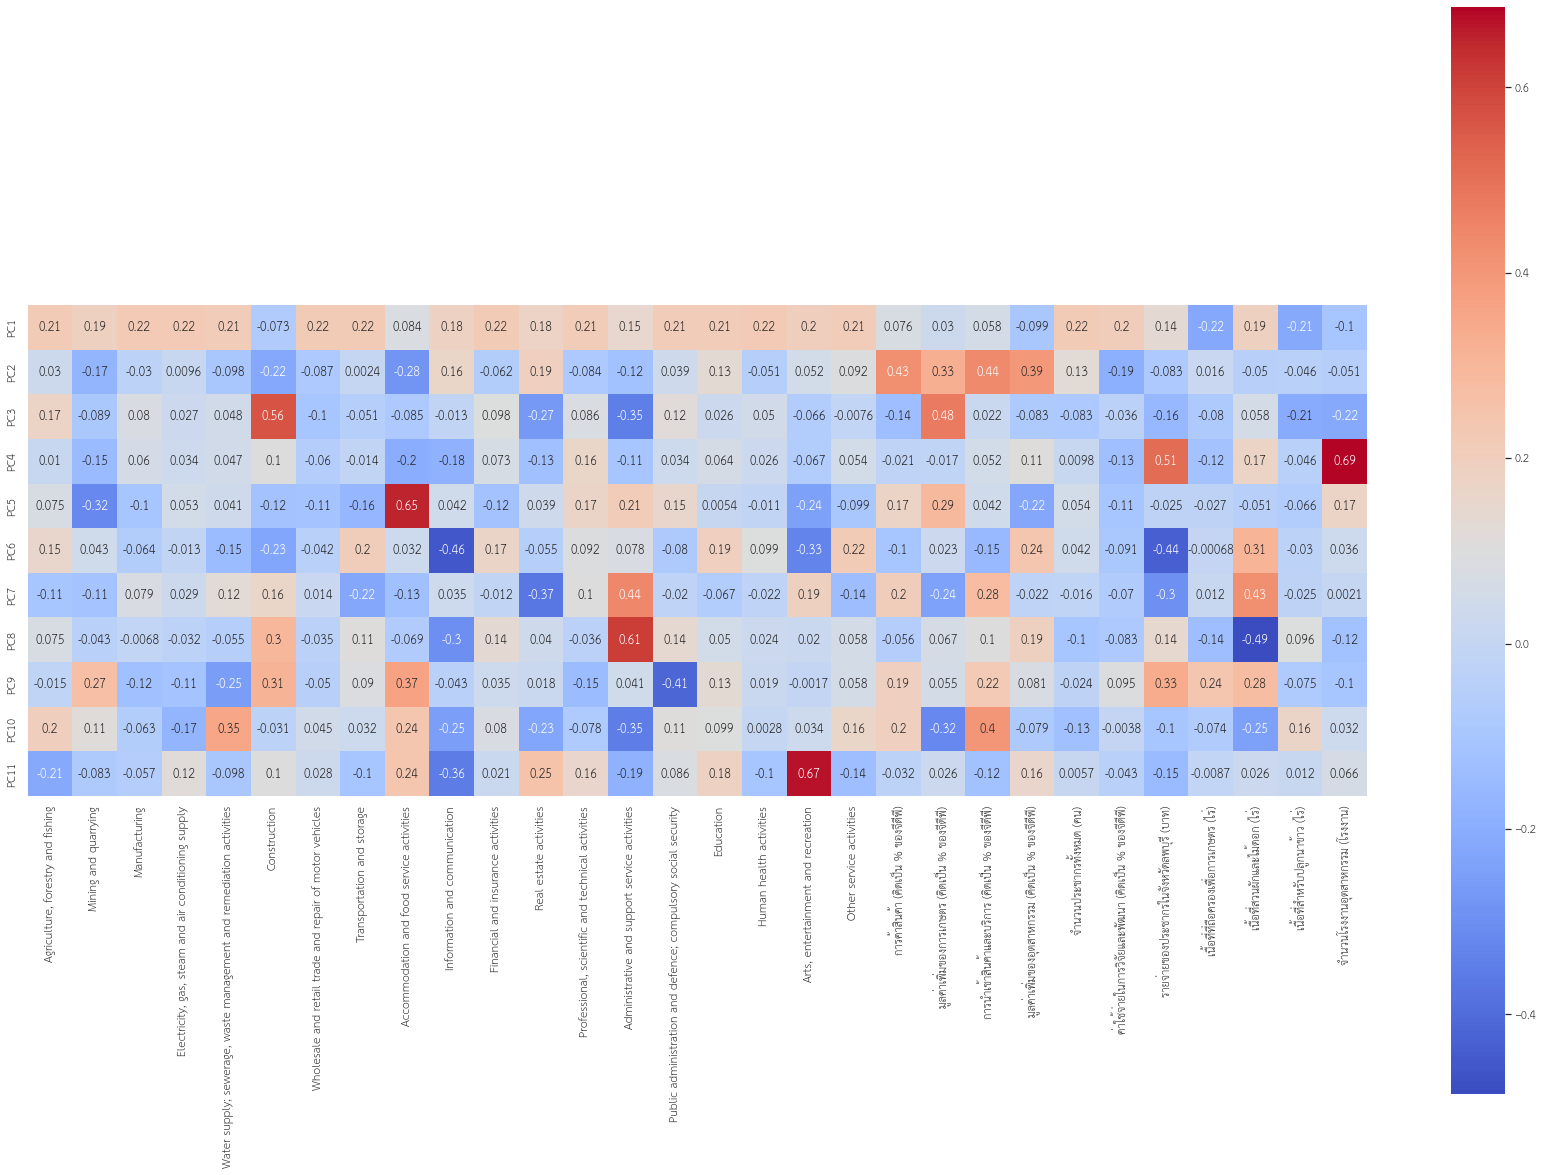

In [29]:
temp_df3 = pd.DataFrame(pca11.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9", 9:"PC10", 10:"PC11"}, inplace=True)

plt.figure(figsize=(30,20))

sns.heatmap(temp_df3,cmap='coolwarm',
            annot=True,            
            square=True,   
            linecolor=(0,0,0))

In [30]:
res = {}
for row1 in temp_df3.index:
    rows = []
    for col1 in temp_df3.columns:
        #print(temp_df3[col1][row1])
        if abs(temp_df3[col1][row1]) >= 0.5: rows.append(col1)
    res[row1] = rows
res

{'PC1': [],
 'PC2': [],
 'PC3': ['Construction'],
 'PC4': ['รายจ่ายของประชากรในจังหวัดลพบุรี (บาท)',
  'จำนวนโรงงานอุตสาหกรรม (โรงงาน)'],
 'PC5': ['Accommodation and food service activities'],
 'PC6': [],
 'PC7': [],
 'PC8': ['Administrative and support service activities'],
 'PC9': [],
 'PC10': [],
 'PC11': ['Arts, entertainment and recreation']}